<a href="https://colab.research.google.com/github/idc315/presentation-1-group-9/blob/main/Copy_of_Youtube_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-api-python-client
!pip install --upgrade google-auth-oauthlib google-auth-httplib2
!pip install isodate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.137.0
    Uninstalling google-api-python-client-2.137.0:
      Successfully uninstalled google-api-python-client-2.137.0


In [ ]:
import pandas as pd
import numpy as np
import os

import google.oauth2.credentials
import google_auth_oauthlib.flow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
import isodate

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone




In [ ]:
API_KEY = ''

youtube = build('youtube', 'v3', developerKey=API_KEY)

def convert_duration(duration):
    try:
        duration = isodate.parse_duration(duration)
        return duration.total_seconds()
    except isodate.ISO8601Error:
        return 0

def get_videos_by_category(category_id, max_results, region_code='JP'):
    video_data = []
    next_page_token = None
    count = 0

    while count < max_results:
        response = youtube.search().list(
            part='snippet',
            type='video',
            videoCategoryId=category_id,
            maxResults=50,
            regionCode=region_code,
            pageToken=next_page_token
        ).execute()

        for item in response['items']:
            video_id = item['id']['videoId']
            video_info = youtube.videos().list(
                part='snippet,contentDetails,statistics',
                id=video_id
            ).execute()

            for video in video_info['items']:
                if 'contentDetails' in video and 'duration' in video['contentDetails']:
                    title = video['snippet']['title']
                    upload_date = video['snippet']['publishedAt']
                    views = video['statistics'].get('viewCount', 0) if 'statistics' in video else 0
                    duration = video['contentDetails']['duration']
                    length_seconds = convert_duration(duration)

                video_data.append({
                    'title': title,
                    'upload_date': upload_date,
                    'views': views,
                    'length_seconds': length_seconds
                })

                count += 1
                if count >= max_results:
                    break

        next_page_token = response.get('nextPageToken')

        if not next_page_token:
            break

    return video_data


category_id = '10'
video_data = get_videos_by_category(category_id, max_results=1000)

for video in video_data:
    print(f"Title: {video['title']}")
    print(f"Upload Date: {video['upload_date']}")
    print(f"Views: {video['views']}")
    print(f"Length (seconds): {video['length_seconds']}")
    print('-' * 50)


Title: 🔴スタバ音楽 𝐁𝐆𝐌】木曜日の朝、4月のベストソングを聴いてください -コーヒーショップでスターバックスのジャズピアノ音楽を聴きながら朝の気分を盛り上げましょう - 朝起きたらコーヒーを飲みましょう。
Upload Date: 2024-10-13T13:35:11Z
Views: 3072
Length (seconds): 0.0
--------------------------------------------------
Title: Aimer「残響散歌」MUSIC VIDEO（テレビアニメ「鬼滅の刃」遊郭編オープニングテーマ）
Upload Date: 2021-12-12T15:00:11Z
Views: 233974839
Length (seconds): 182.0
--------------------------------------------------
Title: King & Prince「ツキヨミ」MV YouTube Edit
Upload Date: 2022-10-11T11:00:10Z
Views: 173885712
Length (seconds): 163.0
--------------------------------------------------
Title: TWICE 「Celebrate」 Music Video
Upload Date: 2022-07-14T15:00:32Z
Views: 79188044
Length (seconds): 186.0
--------------------------------------------------
Title: TXT(투모로우바이투게더) ‘Magic’ Special Performance Video
Upload Date: 2021-06-30T10:00:00Z
Views: 24701519
Length (seconds): 167.0
--------------------------------------------------
Title: Westlife - The Rose (Official Video)
Upload Date: 2009-10-03T19:51:58Z
Vi

In [ ]:
df = pd.DataFrame(video_data)
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df_sorted = df.sort_values(by=['views'], ascending=False)
df_sorted

,title,upload_date,views,length_seconds
37,米津玄師 Kenshi Yonezu - Lemon,2018-02-26T23:00:04Z,885568063,275.0
207,DAOKO × 米津玄師『打上花火』MUSIC VIDEO,2017-08-09T15:01:26Z,634142717,293.0
196,DAOKO × 米津玄師『打上花火』MUSIC VIDEO,2017-08-09T15:01:26Z,634142717,293.0
122,YOASOBI「アイドル」 Official Music Video,2023-04-12T15:30:09Z,537032635,226.0
104,Official髭男dism - Pretender［Official Video］,2019-04-16T13:58:12Z,532500692,336.0
...,...,...,...,...
521,#sumika #LIVE #StartingOver,2024-10-13T13:00:02Z,1101,59.0
393,B’ｚのコピー動画やってる人の9割以上は…#ギター,2024-10-13T13:00:06Z,417,45.0
524,ジュリー💗が歌う「硝子坂」🎶「飛んでイスタンブール」 #沢田研二 #昭和歌謡,2024-10-13T12:58:03Z,338,52.0
522,大家想要聽完整版嗎？💭 @patrickbrasca,2024-10-13T12:25:00Z,273,25.0


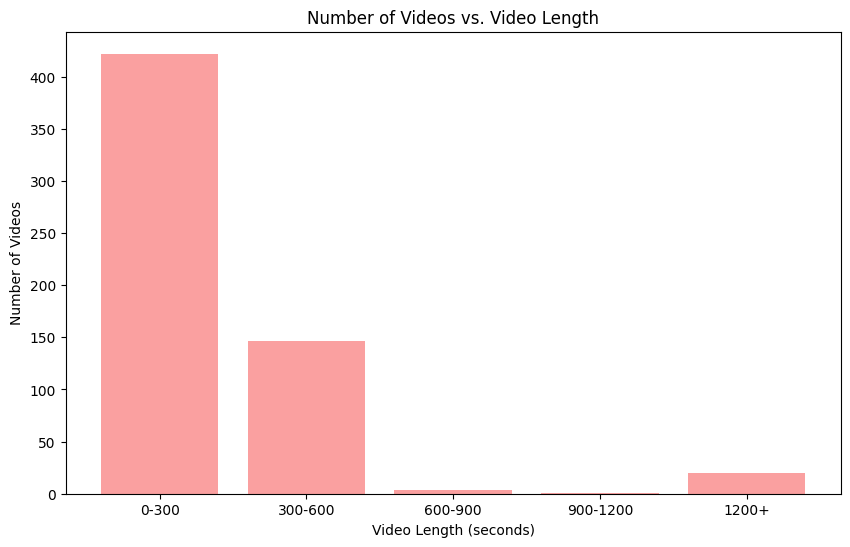

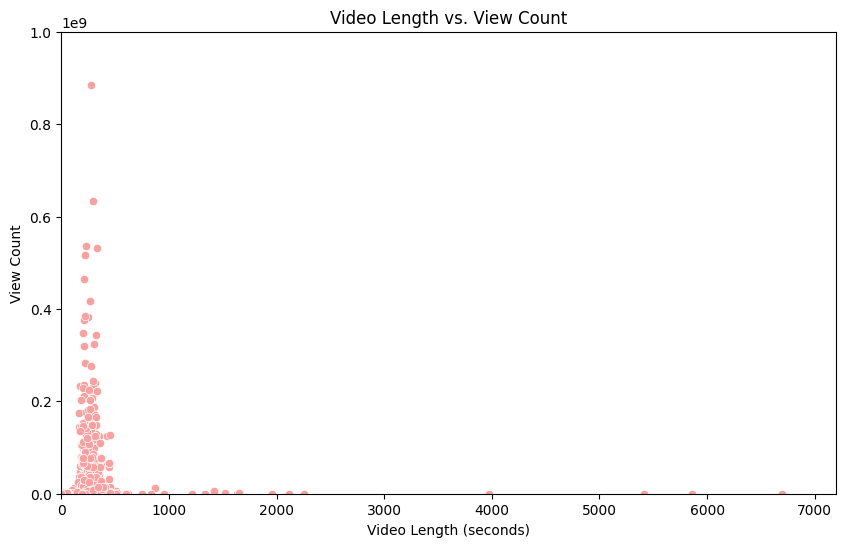


Correlation between video length and view count: -0.05889642350536293


In [ ]:
df['views'] = pd.to_numeric(df['views'])

bins = [0, 300, 600, 900, 1200, float('inf')]
labels = ['0-300', '300-600', '600-900', '900-1200', '1200+']
df['length_bin'] = pd.cut(df['length_seconds'], bins=bins, labels=labels)

video_counts = df['length_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(video_counts.index, video_counts.values, color='#FAA0A0')
plt.title('Number of Videos vs. Video Length')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Number of Videos')
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_seconds', y='views', data=df, color='#FAA0A0')
plt.title('Video Length vs. View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.ylim(0, 1000000000)
plt.xlim(0, 7200)
plt.show()

correlation = df['length_seconds'].corr(df['views'])
print()
print(f"Correlation between video length and view count: {correlation}")


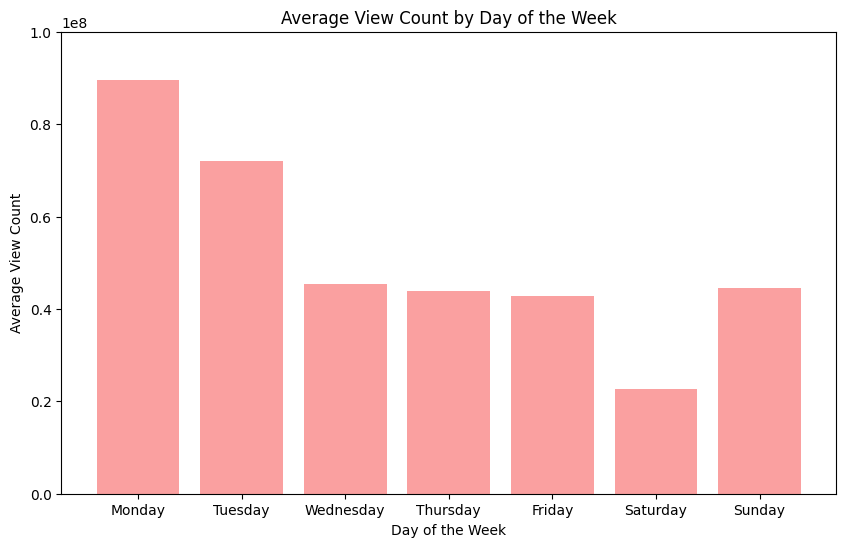

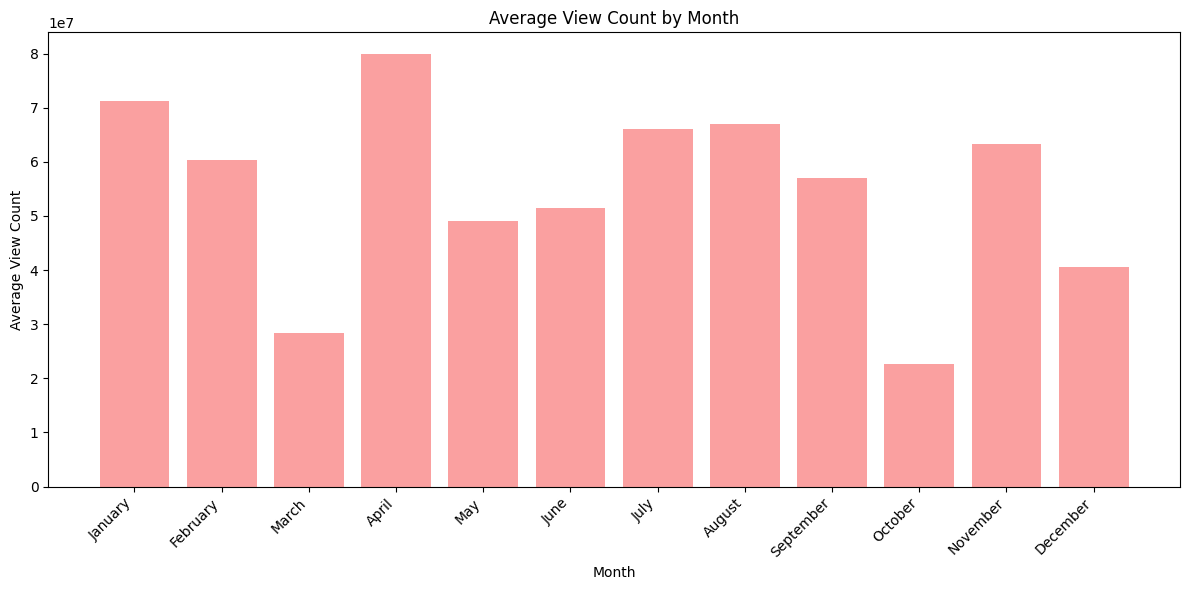

In [ ]:
df['upload_date'] = pd.to_datetime(df['upload_date'], utc=True)
df['day_of_week'] = df['upload_date'].dt.dayofweek
df['month'] = df['upload_date'].dt.month
average_views_by_day = df.groupby('day_of_week')['views'].mean()
average_views_by_month = df.groupby('month')['views'].mean()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.bar(average_views_by_day.index, average_views_by_day.values, color='#FAA0A0')
plt.title('Average View Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.ylim(0, 100000000)
plt.xticks(average_views_by_day.index, day_names)
plt.show()

print()

plt.figure(figsize=(12, 6))
plt.bar(average_views_by_month.index, average_views_by_month.values, color='#FAA0A0')
plt.title('Average View Count by Month')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.xticks(average_views_by_month.index, month_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
length_seconds_median = df['length_seconds'].median()


longer_vid = df[df['length_seconds'] > length_seconds_median]['views']
print(longer_vid)
shorter_vid = df[df['length_seconds'] <= length_seconds_median]['views']

from scipy import stats

t_statistic, p_value = stats.ttest_ind(shorter_vid, longer_vid,alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Null hypothesis: There is no relation between runtime and revenue
# Alternative hypothesis: Longer movies have higher revenue
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that longer movies have higher revenue.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that longer movies have higher revenue.")

24     206361274
27      41812496
28     188366424
30      34880701
37     885568063
         ...    
600        47514
601        67181
602       271186
603        59227
605        29234
Name: views, Length: 298, dtype: int64
T-statistic: -2.6110891360581596
P-value: 0.9953752097979343
Fail to reject the null hypothesis.
There is not enough evidence to suggest that longer movies have higher revenue.
